In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
df_dict = {}
candidate = ['SOL']#,'LINK','DOGE','AVAX','XRP']
for coin in candidate:
    df_dict[coin] = get_data(coin)

Start                               2022-01-01 00:00:00
End                                 2023-11-06 00:00:00
Period                                674 days 01:00:00
Start Value                                     10000.0
Min Value                                   9624.083955
Max Value                                  24150.095965
End Value                                  22587.534142
Total Return [%]                             125.875341
Benchmark Return [%]                          -76.12123
Total Time Exposure [%]                       26.698399
Max Gross Exposure [%]                       107.749661
Max Drawdown [%]                              16.682083
Max Drawdown Duration                 165 days 03:00:00
Total Orders                                         83
Total Fees Paid                              245.175612
Total Trades                                         42
Win Rate [%]                                  63.414634
Best Trade [%]                                24

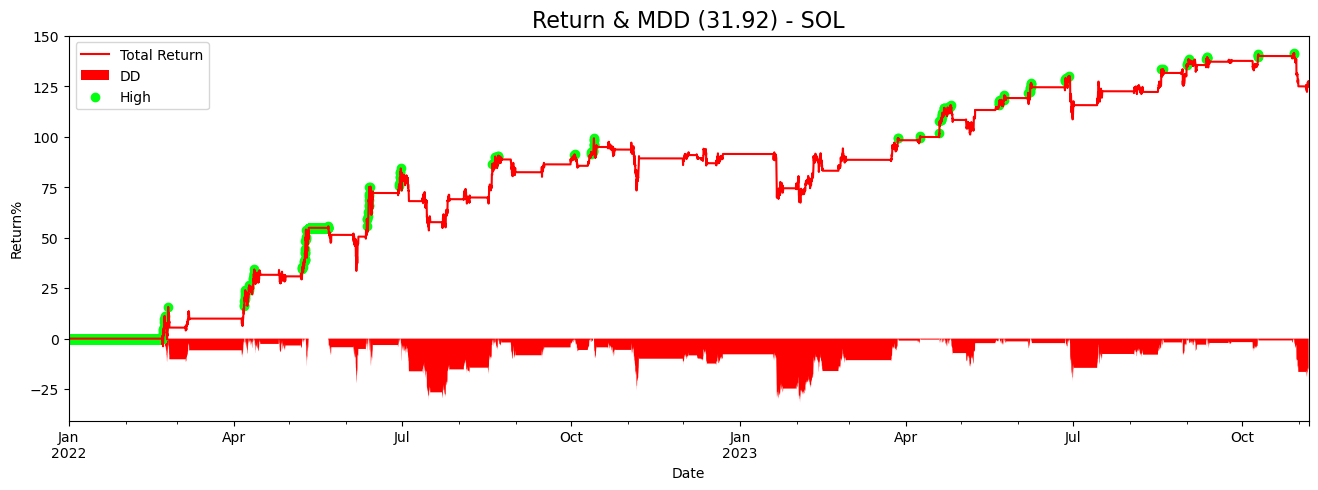

In [4]:
start = '2022-01-01'
sep = ''
end = ''

side = 'short'
# v2
params = {'window_l_k': 40,
    'window_l_d': 48,
    'window_s_k': 100,
    'window_s_d': 126,
    'upper_bound': 95}

config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=[])

<AxesSubplot:xlabel='Entry Index'>

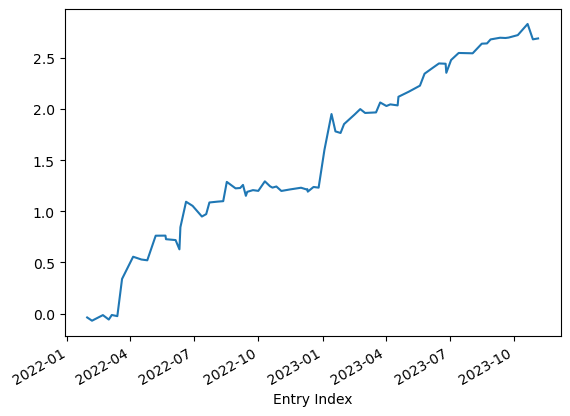

: 

In [8]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL BOTH Optimize Test =======================
Optimization trails: 384


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 15.84 sec
---------- SOL BOTH ----------
{'window_l_k': 40, 'window_l_d': 48, 'window_s_k': 100, 'window_s_d': 126}
Start                               2022-01-01 00:00:00
End                                 2023-11-01 23:00:00
Period                                670 days 00:00:00
Start Value                                     10000.0
Min Value                                   7836.836323
Max Value                                  48622.073137
End Value                                  45928.070019
Total Return [%]                               359.2807
Benchmark Return [%]                         -75.426334
Total Time Exposure [%]                       65.136816
Max Gross Exposure [%]                       109.864782
Max Drawdown [%]                                23.4124
Max Drawdown Duration                 134 days 04:00:00
Total Orders                                        155
Total Fees Paid                              464.331663
Total Trades             

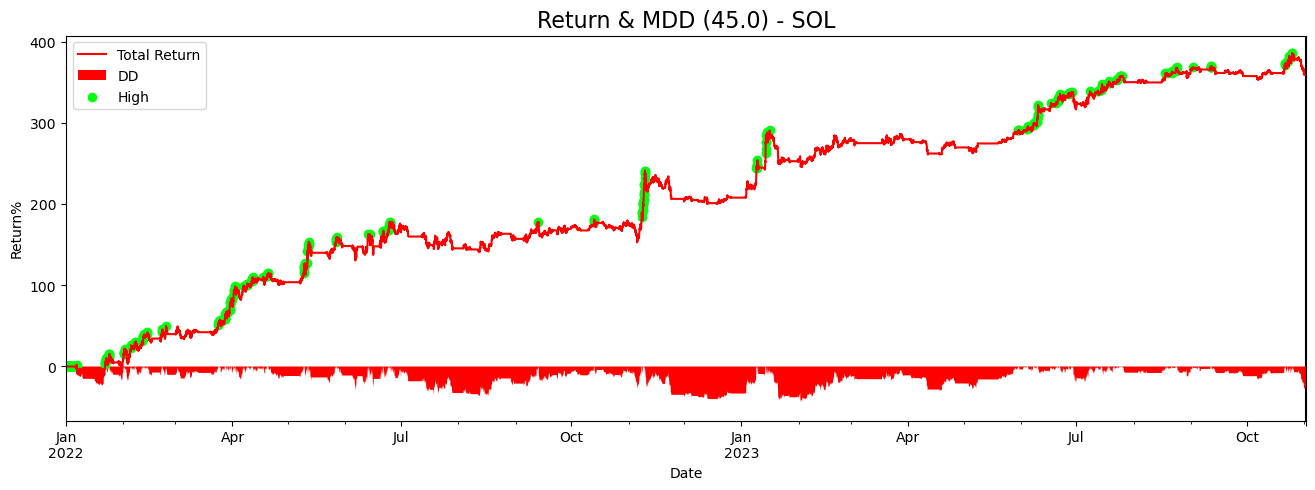

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     89.66 | 10884.4  | -2320.86 |       4.69 |   54.55 |         11 |
| 2022-06    |     74.48 |  9192.2  | -1744.06 |       5.27 |   54.55 |         11 |
| 2022-09    |      7.5  |  3389.42 | -2639.78 |       1.28 |   54.55 |         11 |
| 2022-12    |     40.47 |  7505.27 | -3458.7  |       2.17 |   38.46 |         13 |
| 2023-03    |     71.83 |  9412.47 | -2229.19 |       4.22 |   70    |         10 |
| 2023-06    |     43.86 |  7120.97 | -2734.55 |       2.6  |   60    |         10 |
| 2023-09    |     34.04 |  4249.44 |  -845.12 |       5.03 |   55.56 |          9 |
| 2023-12    |      1.46 |  2153.27 | -2007.16 |       1.07 |   66.67 |          3 |
+------------+-----------+----------+----------+------------+---------+-----------

{'SOL': {'both': {0: {'window_l_k': 40,
    'window_l_d': 48,
    'window_s_k': 100,
    'window_s_d': 126}}}}

In [2]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-11-01'

params={
    'window_l_k': [40, 100, 8],
    'window_l_d': [40, 60, 8],
    'window_s_k': [100, 130, 8],
    'window_s_d': [110, 140, 8],
    }

config = {'freq':'1h','fee': 0.0003}
symbol_list = ['SOL']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(['SOL'],sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
multi_test.save_version_result(all_params,value_df,trades,1)
all_params